In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import sys
sys.path.insert(0, str(Path.cwd().parent))
import scripts.eda_toolkit as eda
import sklearn
from sklearn.model_selection import train_test_split
import scripts.functions as fn
from scripts.train_svc import svc_preprocess, train_svc
from scripts.train_lrc import lrc_preprocess, train_lrc
from scripts.train_rf import rf_preprocess, train_rfc

In [2]:
RANDOM_STATE = 8

home = Path.cwd().parent
data_dir = home / "data"
notebook_dir = home / "notebooks"
df = pd.read_csv(data_dir / "processed" / "train_data.csv")
sklearn.set_config(transform_output="pandas")

In [3]:
X_train, X_val, y_train, y_val = train_test_split(
    df.drop(columns=["class"]),
    df["class"],
    test_size=150,
    random_state=RANDOM_STATE,
    stratify=df["class"]
)

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((691, 20), (691,), (150, 20), (150,))

In [4]:
X_svc, svc_pipeline = svc_preprocess(X_train, y_train)
X_lrc, lrc_pipeline = lrc_preprocess(X_train, y_train)
X_rf, rf_pipeline = rf_preprocess(X_train, y_train)

2026/01/18 21:09:36 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2026/01/18 21:09:36 INFO mlflow.store.db.utils: Updating database tables
2026/01/18 21:09:36 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2026/01/18 21:09:36 INFO alembic.runtime.migration: Will assume non-transactional DDL.
2026/01/18 21:09:36 INFO mlflow.store.db.utils: Updating database tables
2026/01/18 21:09:36 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2026/01/18 21:09:36 INFO alembic.runtime.migration: Will assume non-transactional DDL.
2026/01/18 21:09:36 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2026/01/18 21:09:36 INFO alembic.runtime.migration: Will assume non-transactional DDL.
2026/01/18 21:09:36 INFO alembic.runtime.migration: Context impl SQLiteImpl.
2026/01/18 21:09:36 INFO alembic.runtime.migration: Will assume non-transactional DDL.



────────────────────────────────────────

SVC

ROC AUC: 0.8421 ± 0.0063 (train), 0.7863 ± 0.0323 (validation)

🔍 DIAGNOSIS:
✅ Good bias-variance tradeoff - Ready for tuning
ROC AUC: 0.8421 ± 0.0063 (train), 0.7863 ± 0.0323 (validation)

🔍 DIAGNOSIS:
✅ Good bias-variance tradeoff - Ready for tuning


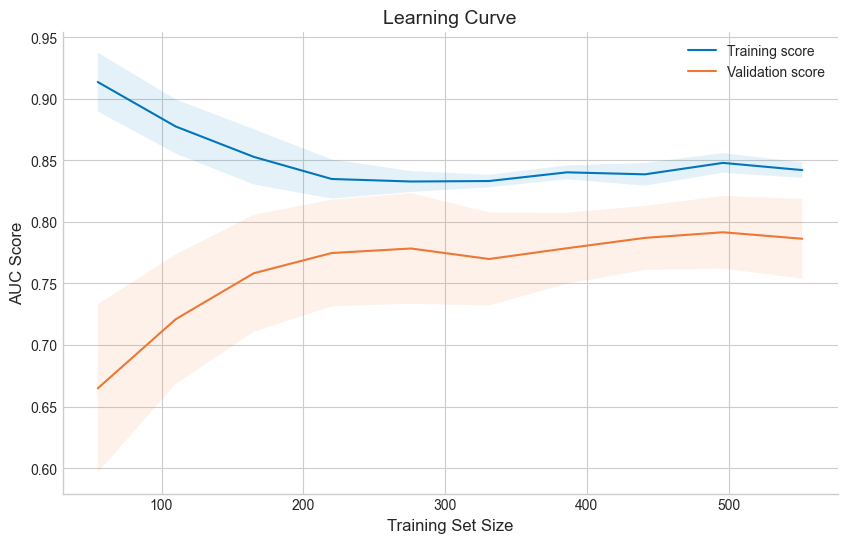




────────────────────────────────────────
Evaluation Metrics for SVC:
   ROC AUC:  0.7929
   Accuracy: 0.6000
   F1:       0.6341
   Precision:0.8966

   Total Cost: 84 | Avg Cost: 0.5600


────────────────────────────────────────
Evaluation Metrics for SVC:
   ROC AUC:  0.7929
   Accuracy: 0.6000
   F1:       0.6341
   Precision:0.8966

   Total Cost: 84 | Avg Cost: 0.5600


────────────────────────────────────────

Logistic Regression


────────────────────────────────────────

Logistic Regression

ROC AUC: 0.8286 ± 0.0062 (train), 0.7796 ± 0.0226 (validation)

🔍 DIAGNOSIS:
✅ Good bias-variance tradeoff - Ready for tuning
ROC AUC: 0.8286 ± 0.0062 (train), 0.7796 ± 0.0226 (validation)

🔍 DIAGNOSIS:
✅ Good bias-variance tradeoff - Ready for tuning


/Users/fotisn/code/repos/credit-risk-svm/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:490: FitFailedWarning: 
1 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/fotisn/code/repos/credit-risk-svm/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 833, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/fotisn/code/repos/credit-risk-svm/.venv/lib/python3.13/site-packages/sklearn/base.py", line 1336, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/fotisn/

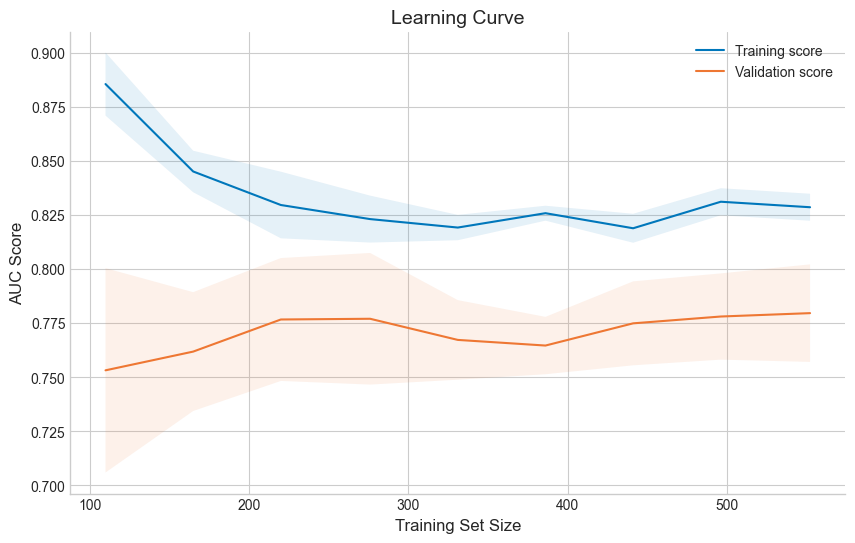




────────────────────────────────────────
Evaluation Metrics for Logistic Regression:
   ROC AUC:  0.7702
   Accuracy: 0.5667
   F1:       0.5806
   Precision:0.9184

   Total Cost: 81 | Avg Cost: 0.5400


────────────────────────────────────────

Random Forest Classifier


────────────────────────────────────────

Random Forest Classifier

ROC AUC: 0.8711 ± 0.0050 (train), 0.7831 ± 0.0320 (validation)

🔍 DIAGNOSIS:
✅ Good bias-variance tradeoff - Ready for tuning
ROC AUC: 0.8711 ± 0.0050 (train), 0.7831 ± 0.0320 (validation)

🔍 DIAGNOSIS:
✅ Good bias-variance tradeoff - Ready for tuning


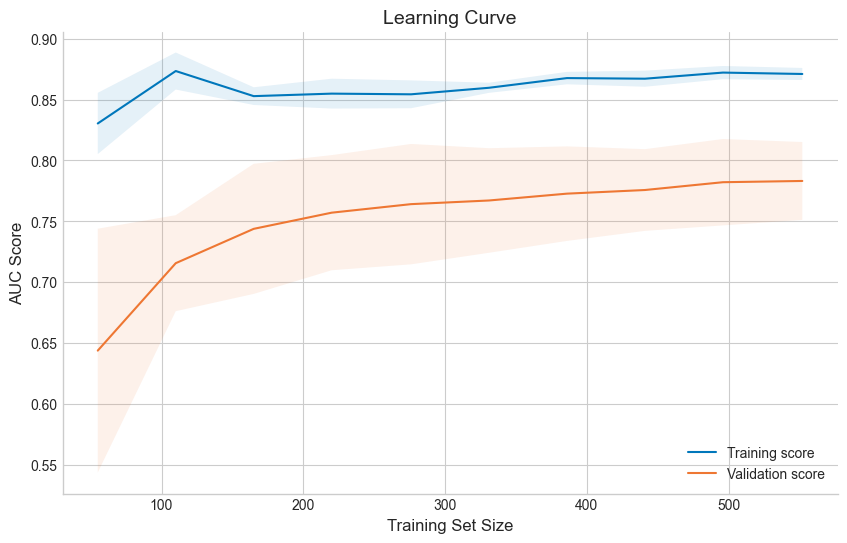




────────────────────────────────────────
Evaluation Metrics for Random Forest Classifier:
   ROC AUC:  0.7807
   Accuracy: 0.5267
   F1:       0.5298
   Precision:0.8889

   Total Cost: 91 | Avg Cost: 0.6067


────────────────────────────────────────
Evaluation Metrics for Random Forest Classifier:
   ROC AUC:  0.7807
   Accuracy: 0.5267
   F1:       0.5298
   Precision:0.8889

   Total Cost: 91 | Avg Cost: 0.6067



In [5]:
CV = 5
RANDOM_STATE = 8

svc, svc_pipeline = train_svc(
    X_train, y_train, X_val, y_val,
    svc_pipeline, cv=CV, random_state=RANDOM_STATE,
    tune=True, use_smote=True, evaluate=True,
    tune_threshold=True, log_model=False 
    )

lrc, lrc_pipeline = train_lrc(
    X_train, y_train, X_val, y_val,
    lrc_pipeline, cv=CV, random_state=RANDOM_STATE,
    tune=True, use_smote=True, evaluate=True,
    tune_threshold=True, log_model=False
    )

rfc, rf_pipeline = train_rfc(
    X_train, y_train, X_val, y_val,
    rf_pipeline, cv=CV, random_state=RANDOM_STATE,
    tune=True, evaluate=True,
    tune_threshold=True, log_model=False
    )

In [10]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, roc_auc_score, recall_score
from scripts.functions import calculate_cost

def evaluate_voting_clf(X_val, y_val, svc, lrc, rfc, 
                        svc_pipeline, lrc_pipeline, rf_pipeline,
                        weights=[1, 1, 1], threshold=0.5, show_details=True):
    """
    Evaluate a soft voting ensemble classifier on validation data.
    
    Args:
        X_val: Raw validation features (not preprocessed)
        y_val: True labels
        svc, lrc, rfc: Trained model objects
        svc_pipeline, lrc_pipeline, rf_pipeline: Preprocessing pipelines
        weights: List of weights for [lrc, rfc, svc]
        threshold: Decision threshold for final prediction
        show_details: Whether to show individual model performance
        
    Returns:
        Dictionary with evaluation metrics
    """
    # Transform data through each pipeline
    X_val_svc = svc_pipeline.transform(X_val)
    X_val_lrc = lrc_pipeline.transform(X_val)
    X_val_rf = rf_pipeline.transform(X_val)
    
    # Get probabilities from each model
    proba_lrc = lrc.predict_proba(X_val_lrc)[:, 1]
    proba_rfc = rfc.predict_proba(X_val_rf)[:, 1]
    proba_svc = svc.predict_proba(X_val_svc)[:, 1]
    
    # Get individual predictions
    pred_lrc = lrc.predict(X_val_lrc)
    pred_rfc = rfc.predict(X_val_rf)
    pred_svc = svc.predict(X_val_svc)
    
    print("=" * 60)
    print("VOTING CLASSIFIER EVALUATION")
    print("=" * 60)
    
    if show_details:
        print("\n--- Individual Model Performance ---\n")
        
        # LRC metrics
        print("Logistic Regression:")
        print(f"  Accuracy: {accuracy_score(y_val, pred_lrc):.4f}")
        print(f"  F1 Score: {f1_score(y_val, pred_lrc):.4f}")
        print(f"  ROC AUC:  {roc_auc_score(y_val, proba_lrc):.4f}")
        cost_lrc, avg_cost_lrc = calculate_cost(y_val, pred_lrc)
        print(f"  Cost:     {cost_lrc} | Avg: {avg_cost_lrc:.4f}")
        
        # RFC metrics
        print("\nRandom Forest:")
        print(f"  Accuracy: {accuracy_score(y_val, pred_rfc):.4f}")
        print(f"  F1 Score: {f1_score(y_val, pred_rfc):.4f}")
        print(f"  ROC AUC:  {roc_auc_score(y_val, proba_rfc):.4f}")
        cost_rfc, avg_cost_rfc = calculate_cost(y_val, pred_rfc)
        print(f"  Cost:     {cost_rfc} | Avg: {avg_cost_rfc:.4f}")
        
        # SVC metrics
        print("\nSVC:")
        print(f"  Accuracy: {accuracy_score(y_val, pred_svc):.4f}")
        print(f"  F1 Score: {f1_score(y_val, pred_svc):.4f}")
        print(f"  ROC AUC:  {roc_auc_score(y_val, proba_svc):.4f}")
        cost_svc, avg_cost_svc = calculate_cost(y_val, pred_svc)
        print(f"  Cost:     {cost_svc} | Avg: {avg_cost_svc:.4f}")
    
    # Weighted soft voting
    total_weight = sum(weights)
    ensemble_proba = (
        weights[0] * proba_lrc +
        weights[1] * proba_rfc +
        weights[2] * proba_svc
    ) / total_weight
    
    ensemble_pred = (ensemble_proba >= threshold).astype(int)
    
    print("\n--- Ensemble Performance (Soft Voting) ---\n")
    
    accuracy = accuracy_score(y_val, ensemble_pred)
    f1 = f1_score(y_val, ensemble_pred)
    precision = precision_score(y_val, ensemble_pred)
    roc_auc = roc_auc_score(y_val, ensemble_proba)
    cost, avg_cost = calculate_cost(y_val, ensemble_pred)
    
    print(f"  Weights:    LRC={weights[0]}, RFC={weights[1]}, SVC={weights[2]}")
    print(f"  Threshold:  {threshold}")
    print(f"  Accuracy:   {accuracy:.4f}")
    print(f"  F1 Score:   {f1:.4f}")
    print(f"  Precision:  {precision:.4f}")
    print(f"  ROC AUC:    {roc_auc:.4f}")
    print(f"  Total Cost: {cost} | Avg Cost: {avg_cost:.4f}")
    print("=" * 60)
    
    return {
        'accuracy': accuracy,
        'f1': f1,
        'precision': precision,
        'roc_auc': roc_auc,
        'cost': cost,
        'avg_cost': avg_cost,
        'ensemble_proba': ensemble_proba,
        'ensemble_pred': ensemble_pred
    }

In [7]:
# Test the voting classifier with default settings
results = evaluate_voting_clf(
    X_val, y_val, 
    svc, lrc, rfc,
    svc_pipeline, lrc_pipeline, rf_pipeline,
    weights=[1, 1, 1], 
    threshold=0.5,
    show_details=True
)

VOTING CLASSIFIER EVALUATION

--- Individual Model Performance ---

Logistic Regression:
  Accuracy: 0.5667
  F1 Score: 0.5806
  ROC AUC:  0.7702
  Cost:     81 | Avg: 0.5400

Random Forest:
  Accuracy: 0.5267
  F1 Score: 0.5298
  ROC AUC:  0.7807
  Cost:     91 | Avg: 0.6067

SVC:
  Accuracy: 0.6000
  F1 Score: 0.6341
  ROC AUC:  0.7929
  Cost:     84 | Avg: 0.5600

--- Ensemble Performance (Soft Voting) ---

  Weights:    LRC=1, RFC=1, SVC=1
  Threshold:  0.5
  Accuracy:   0.7667
  F1 Score:   0.8325
  Precision:  0.8447
  ROC AUC:    0.7905
  Total Cost: 99 | Avg Cost: 0.6600


## Step 1: Weight Tuning (with fixed threshold=0.5)
Find the optimal weights for each classifier first, using a standard threshold.

In [8]:
# Step 1: Weight tuning with fixed threshold=0.5
# Weights determine the "shape" of ensemble probabilities - tune this first

X_val_svc = svc_pipeline.transform(X_val)
X_val_lrc = lrc_pipeline.transform(X_val)
X_val_rf = rf_pipeline.transform(X_val)

proba_lrc = lrc.predict_proba(X_val_lrc)[:, 1]
proba_rfc = rfc.predict_proba(X_val_rf)[:, 1]
proba_svc = svc.predict_proba(X_val_svc)[:, 1]

# Fixed threshold for weight tuning
fixed_threshold = 0.5

# Define weight search space
weight_range = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
weight_results = []

print(f"Weight Tuning Results (using fixed threshold={fixed_threshold})")
print("-" * 70)
print(f"{'LRC':>6} | {'RFC':>6} | {'SVC':>6} | {'Cost':>8} | {'Avg Cost':>10} | {'F1':>8}")
print("-" * 70)

for w_lrc in weight_range:
    for w_rfc in weight_range:
        for w_svc in weight_range:
            weights = [w_lrc, w_rfc, w_svc]
            total_weight = sum(weights)
            
            # Calculate weighted ensemble probability
            ensemble_proba = (
                w_lrc * proba_lrc + 
                w_rfc * proba_rfc + 
                w_svc * proba_svc
            ) / total_weight
            
            pred = (ensemble_proba >= fixed_threshold).astype(int)
            cost, avg_cost = calculate_cost(y_val, pred)
            f1 = f1_score(y_val, pred)
            roc_auc = roc_auc_score(y_val, ensemble_proba)
            
            weight_results.append({
                'w_lrc': w_lrc,
                'w_rfc': w_rfc,
                'w_svc': w_svc,
                'cost': cost,
                'avg_cost': avg_cost,
                'f1': f1,
                'roc_auc': roc_auc
            })

# Sort by cost and show top 10
weight_results_sorted = sorted(weight_results, key=lambda x: x['cost'])

print("\n📊 TOP 10 WEIGHT COMBINATIONS (sorted by cost):")
print("-" * 70)
for i, r in enumerate(weight_results_sorted[:10]):
    print(f"{r['w_lrc']:>6.1f} | {r['w_rfc']:>6.1f} | {r['w_svc']:>6.1f} | {r['cost']:>8} | {r['avg_cost']:>10.4f} | {r['f1']:>8.4f}")

# Best weights
best_weights = weight_results_sorted[0]
print("-" * 70)
print(f"\n✅ BEST WEIGHTS: LRC={best_weights['w_lrc']}, RFC={best_weights['w_rfc']}, SVC={best_weights['w_svc']}")
print(f"   Cost: {best_weights['cost']} | Avg Cost: {best_weights['avg_cost']:.4f}")
print(f"   F1: {best_weights['f1']:.4f} | ROC AUC: {best_weights['roc_auc']:.4f}")

Weight Tuning Results (using fixed threshold=0.5)
----------------------------------------------------------------------
   LRC |    RFC |    SVC |     Cost |   Avg Cost |       F1
----------------------------------------------------------------------

📊 TOP 10 WEIGHT COMBINATIONS (sorted by cost):
----------------------------------------------------------------------
   1.5 |    1.0 |    1.0 |       87 |     0.5800 |   0.8276
   1.5 |    1.0 |    1.5 |       87 |     0.5800 |   0.8276
   2.0 |    1.0 |    1.5 |       87 |     0.5800 |   0.8276
   2.5 |    1.5 |    1.5 |       87 |     0.5800 |   0.8276
   2.5 |    1.5 |    2.0 |       87 |     0.5800 |   0.8276
   2.5 |    1.5 |    2.5 |       87 |     0.5800 |   0.8276
   2.5 |    1.5 |    3.0 |       87 |     0.5800 |   0.8276
   3.0 |    1.5 |    2.0 |       87 |     0.5800 |   0.8276
   3.0 |    1.5 |    2.5 |       87 |     0.5800 |   0.8276
   3.0 |    2.0 |    2.0 |       87 |     0.5800 |   0.8276
-----------------------------

## Step 2: Threshold Tuning (with optimal weights)
Now that we have the best weights, tune the threshold for cost-sensitive classification.

In [11]:
# Threshold tuning - using the best weights found in Step 1
best_weights_list = [best_weights['w_lrc'], best_weights['w_rfc'], best_weights['w_svc']]

# Calculate weighted ensemble probability with optimal weights
total_weight = sum(best_weights_list)
ensemble_proba = (
    best_weights['w_lrc'] * proba_lrc + 
    best_weights['w_rfc'] * proba_rfc + 
    best_weights['w_svc'] * proba_svc
) / total_weight

# Search thresholds
thresholds = np.linspace(0.2, 0.8, 61)
threshold_results = []

print(f"Threshold Tuning (using weights: LRC={best_weights['w_lrc']}, RFC={best_weights['w_rfc']}, SVC={best_weights['w_svc']})")
print("-" * 70)
print(f"{'Threshold':>10} | {'Cost':>8} | {'Avg Cost':>10} | {'F1':>8} | {'Precision':>10} | {'Recall':>8}")
print("-" * 70)

for thresh in thresholds:
    pred = (ensemble_proba >= thresh).astype(int)
    cost, avg_cost = calculate_cost(y_val, pred)
    f1 = f1_score(y_val, pred, zero_division=0)
    prec = precision_score(y_val, pred, zero_division=0)
    rec = recall_score(y_val, pred, zero_division=0)
    
    threshold_results.append({
        'threshold': thresh,
        'cost': cost,
        'avg_cost': avg_cost,
        'f1': f1,
        'precision': prec,
        'recall': rec
    })

# Sort by cost
threshold_results_sorted = sorted(threshold_results, key=lambda x: x['cost'])

print("\n📊 TOP 10 THRESHOLDS (sorted by cost):")
print("-" * 70)
for r in threshold_results_sorted[:10]:
    print(f"{r['threshold']:>10.2f} | {r['cost']:>8} | {r['avg_cost']:>10.4f} | {r['f1']:>8.4f} | {r['precision']:>10.4f} | {r['recall']:>8.4f}")

best_thresh_result = threshold_results_sorted[0]
print("-" * 70)
print(f"\n✅ OPTIMAL THRESHOLD: {best_thresh_result['threshold']:.2f}")
print(f"   Cost: {best_thresh_result['cost']} | Avg Cost: {best_thresh_result['avg_cost']:.4f}")
print(f"   F1: {best_thresh_result['f1']:.4f} | Precision: {best_thresh_result['precision']:.4f} | Recall: {best_thresh_result['recall']:.4f}")

Threshold Tuning (using weights: LRC=1.5, RFC=1.0, SVC=1.0)
----------------------------------------------------------------------
 Threshold |     Cost |   Avg Cost |       F1 |  Precision |   Recall
----------------------------------------------------------------------

📊 TOP 10 THRESHOLDS (sorted by cost):
----------------------------------------------------------------------
      0.63 |       78 |     0.5200 |   0.7473 |     0.8947 |   0.6415
      0.60 |       80 |     0.5333 |   0.7634 |     0.8875 |   0.6698
      0.64 |       80 |     0.5333 |   0.7333 |     0.8919 |   0.6226
      0.79 |       80 |     0.5333 |   0.5467 |     0.9318 |   0.3868
      0.61 |       81 |     0.5400 |   0.7568 |     0.8861 |   0.6604
      0.62 |       81 |     0.5400 |   0.7568 |     0.8861 |   0.6604
      0.65 |       81 |     0.5400 |   0.7263 |     0.8904 |   0.6132
      0.66 |       81 |     0.5400 |   0.7263 |     0.8904 |   0.6132
      0.69 |       83 |     0.5533 |   0.6784 |     0.8923

## Final Evaluation with Optimal Parameters
Using the best weights from Step 1 and best threshold from Step 2.

In [12]:
# Final evaluation with optimal weights (Step 1) and threshold (Step 2)
optimal_weights = [best_weights['w_lrc'], best_weights['w_rfc'], best_weights['w_svc']]
optimal_threshold = best_thresh_result['threshold']

print("🎯 FINAL OPTIMIZED VOTING CLASSIFIER\n")

final_results = evaluate_voting_clf(
    X_val, y_val, 
    svc, lrc, rfc,
    svc_pipeline, lrc_pipeline, rf_pipeline,
    weights=optimal_weights, 
    threshold=optimal_threshold,
    show_details=True
)

print(f"\n📋 Summary:")
print(f"   Optimal Weights: LRC={optimal_weights[0]}, RFC={optimal_weights[1]}, SVC={optimal_weights[2]}")
print(f"   Optimal Threshold: {optimal_threshold:.2f}")

🎯 FINAL OPTIMIZED VOTING CLASSIFIER

VOTING CLASSIFIER EVALUATION

--- Individual Model Performance ---

Logistic Regression:
  Accuracy: 0.5667
  F1 Score: 0.5806
  ROC AUC:  0.7702
  Cost:     81 | Avg: 0.5400

Random Forest:
  Accuracy: 0.5267
  F1 Score: 0.5298
  ROC AUC:  0.7807
  Cost:     91 | Avg: 0.6067

SVC:
  Accuracy: 0.6000
  F1 Score: 0.6341
  ROC AUC:  0.7929
  Cost:     84 | Avg: 0.5600

--- Ensemble Performance (Soft Voting) ---

  Weights:    LRC=1.5, RFC=1.0, SVC=1.0
  Threshold:  0.6300000000000001
  Accuracy:   0.6933
  F1 Score:   0.7473
  Precision:  0.8947
  ROC AUC:    0.7910
  Total Cost: 78 | Avg Cost: 0.5200

📋 Summary:
   Optimal Weights: LRC=1.5, RFC=1.0, SVC=1.0
   Optimal Threshold: 0.63


## Final evaluation on test set

In [13]:
test_data = pd.read_csv(data_dir / 'processed' / 'test_data.csv')
X_test = test_data.drop(columns=["class"])
y_test = test_data["class"]

final_results = evaluate_voting_clf(
    X_test, y_test, 
    svc, lrc, rfc,
    svc_pipeline, lrc_pipeline, rf_pipeline,
    weights=optimal_weights, 
    threshold=optimal_threshold,
    show_details=True
)

VOTING CLASSIFIER EVALUATION

--- Individual Model Performance ---

Logistic Regression:
  Accuracy: 0.6289
  F1 Score: 0.6380
  ROC AUC:  0.8010
  Cost:     79 | Avg: 0.4969

Random Forest:
  Accuracy: 0.5975
  F1 Score: 0.5949
  ROC AUC:  0.8014
  Cost:     84 | Avg: 0.5283

SVC:
  Accuracy: 0.6918
  F1 Score: 0.7168
  ROC AUC:  0.8136
  Cost:     69 | Avg: 0.4340

--- Ensemble Performance (Soft Voting) ---

  Weights:    LRC=1.5, RFC=1.0, SVC=1.0
  Threshold:  0.6300000000000001
  Accuracy:   0.7233
  F1 Score:   0.7660
  Precision:  0.8780
  ROC AUC:    0.8135
  Total Cost: 84 | Avg Cost: 0.5283
